# Lecture 2.5: The Moran Model

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Example 2.12: Moran Model

**Consider a population with $N=6$ with an initial frequency of $p=0.5$**

**1. What does the transition matrix look like?**

The transition probabilities are given by:

$$
p_{i,j}=\begin{cases}
\frac{i}{N}*\left(1-\frac{i}{N}\right) & \text{if }j=i+1\\
1- 2\frac{i}{N}*\left(1-\frac{i}{N}\right) & \text{if }j=i\\
\left(1-\frac{i}{N}\right)*\frac{i}{N} & \text{if }j=i-1\\
\end{cases}
$$

In [9]:
def PMtrxMoran(N):
    P = np.zeros((N+1, N+1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            if j==i-1:
                P[i,j]= (1-i/N)*i/N
            elif j==i:
                P[i,j]= 1-2*(1-i/N)*i/N
            elif j==i+1:
                P[i,j]= (1-i/N)*i/N
    return P

In [13]:
PMtrxMoran(6)

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.13888889, 0.72222222, 0.13888889, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.22222222, 0.55555556, 0.22222222, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.25      , 0.5       , 0.25      ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.22222222, 0.55555556,
        0.22222222, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.13888889,
        0.72222222, 0.13888889],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

**Check:** The rows sum to 1.

In [24]:
PMoran=PMtrxMoran(6)
row_sums = np.sum(PMoran, axis=1)

print("Sum of Rows:")
print(row_sums)

Sum of Rows:
[1. 1. 1. 1. 1. 1. 1.]


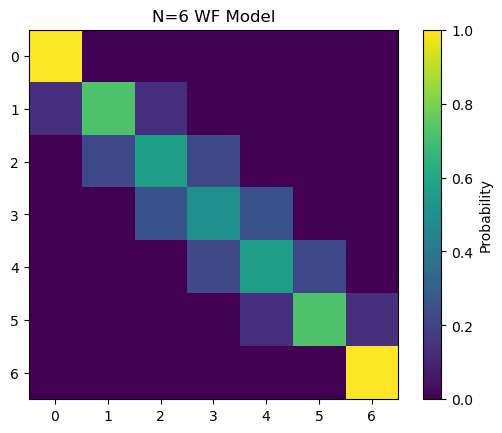

In [25]:
# Create heatmap
plt.imshow(PMoran, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Probability')
plt.title('N=6 WF Model')
plt.show()

**2. Characterize the states of this process.**

State $P_{0,0}=1$ and $P_{N,N}=1$ hence these are absorbing states.  All the other states are transient.

To illustrate this let's take the 100th power of the matrix.

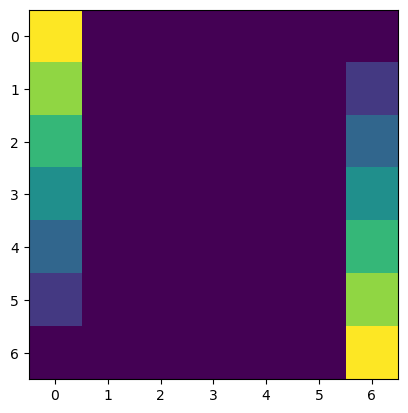

In [26]:
p100=np.linalg.matrix_power(PMoran, 100)
plt.imshow(p100, cmap='viridis', interpolation='nearest');

**3. What is the probability that that the population will have a frequency of $p=0.5$ in the next time step? How about in the next generation? How does this result compare to the WF model?**

In [21]:
V0_Vec=np.zeros(7)
V0_Vec[3]=1
print(V0_Vec)

[0. 0. 0. 1. 0. 0. 0.]


To obtain the next time step we have:

In [27]:
V0_Vec@PMoran

array([0.  , 0.  , 0.25, 0.5 , 0.25, 0.  , 0.  ])

Hence there is a 50% probability of having a frequency of 0.5 in the next time step.

1 generation is equal to N time steps so we have:

$$
\vec{V}(6)=\vec{V}(0).\mathbf{P}^6
$$

In [33]:
VMoran=V0_Vec@np.linalg.matrix_power(PMoran, 6)
print(VMoran)

[0.05841282 0.1473739  0.19125893 0.20590871 0.19125893 0.1473739
 0.05841282]


So the probability of having a frequency of $p=0.5$ after 1 geneartion is 0.2.

Let's compare this to WF model:

In [28]:
def PMtrxWF(N):
    P = np.zeros((N+1, N+1)) #Matrix of 0s

    for i in range(N+1):
        for j in range(N+1):
            P[i, j] = (np.math.comb(N, j) * ((i/N) ** j) * ((1 - i/N) ** (N - j)))

    return P

# Example usage with population size N = 6
PWF = PMtrxWF(6)

In [113]:
VWF=V0_Vec@np.linalg.matrix_power(PWF, 1) #Note that here we use 1 generation.
print(VWF)

[0.015625 0.09375  0.234375 0.3125   0.234375 0.09375  0.015625]


In [114]:
VMoran-VWF

array([ 0.04278782,  0.0536239 , -0.04311607, -0.10659129, -0.04311607,
        0.0536239 ,  0.04278782])

So they are not the same!!!  The moran model has lower intermediate frequencies and higher probability of fixation after 1 generation.

**4. Simulate 100 trajectories in both the WF and Moran model with $N=20$.  Compare them.  For each trajectory, calculate the dynamics of *expected heterozygosity* $H(t)=2p(t)(1-p(t))$, how do these dynamics compare?**

In [57]:
def eventVec(N):
    return np.arange(N+1)
def randSimWF(N,tMax,index): #tMax in the number of generations, index is a dummy variable we will use in a minute
    PMtrx=PMtrxWF(N);
    #Initialize
    out=[10]; 
    temp=10;
    #Itterate
    for t in range(tMax):
        temp=np.random.choice(eventVec(N), p=PMtrx[temp])
        out.append(temp)
    return out
# Create a dictionary to store results
WF_dict = {}

# Calculate and save results for specified indices
for index in range(100):
    WF_dict[index] = randSimWF(20,50,index) #N=20, tMax=50

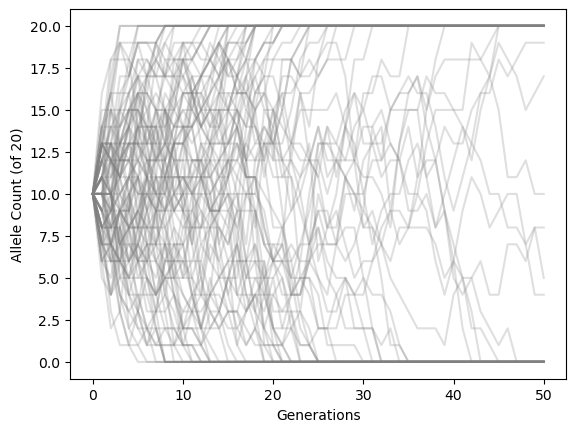

In [58]:
for index in range(100):
    plt.plot( WF_dict[index], label='Vectors',color='gray',alpha=0.25)
plt.xlabel('Generations')
plt.ylabel('Allele Count (of 20)');

In [67]:
def eventVec(N):
    return np.arange(N+1)
def randSimMoran(N,tMax,index): #tMax in the number of generations, index is a dummy variable we will use in a minute
    PMtrx=PMtrxMoran(N);
    #Initialize
    out=[10]; 
    temp=10;
    #Itterate
    for t in range(tMax*N):
        temp=np.random.choice(eventVec(N), p=PMtrx[temp])
        out.append(temp)
    return out
# Create a dictionary to store results
Moran_dict = {}

# Calculate and save results for specified indices
for index in range(100):
    Moran_dict[index] = randSimMoran(20,50,index)  #N=20, tMax=50=50*20 time steps

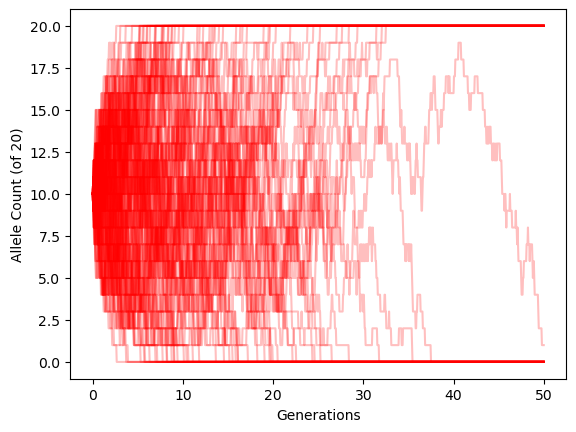

In [69]:
tVec=np.linspace(0, 50, num=50*20+1) # SETTING GENERATIONS
for index in range(100):
    plt.plot(tVec,Moran_dict[index], label='Vectors',color='red',alpha=0.25)
plt.xlabel('Generations')
plt.ylabel('Allele Count (of 20)');

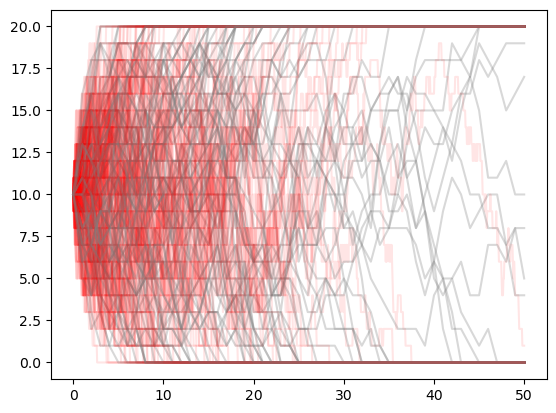

In [72]:
for index in range(100):
    plt.plot(tVec,Moran_dict[index], label='Vectors',color='red',alpha=0.1)
    plt.plot( WF_dict[index], label='Vectors',color='gray',alpha=0.3)

## Example  2.13:  Moran Model With Mutation

**1. Consider the same population with $N=6$, calculate the stationary distribution of the Moran processn with mutation with $u=v=0.05$.**

First we have to create the transition matrix:
$$
p_{i,j}=\begin{cases}
\underbrace{\left[\left(1-\frac{i}{N}\right)v+(1-u)\frac{i}{N}\right]}_{\text{`A' born}}* \underbrace{\left(1-\frac{i}{N}\right)}_{\text{`a' dies}}& \text{if }j=i+1\\
1-p_{i,i-1}-p_{i,i+1} & \text{if }j=i\\
\underbrace{\left[\left(1-\frac{i}{N}\right)(1-v)+u\frac{i}{N}\right]}_{\text{`a' born}}*\underbrace{\frac{i}{N}}_{\text{`A' dies}} & \text{if }j=i-1\\
\end{cases}
$$

Sum of Rows:
[1. 1. 1. 1. 1. 1. 1.]


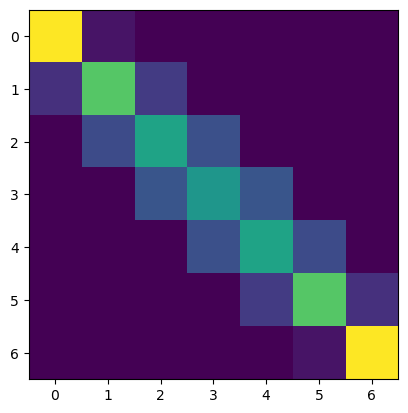

In [79]:
def PMtrxMoranMu(N,mu):
    P = np.zeros((N+1, N+1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            if j==i-1:
                P[i,j]= ((1-i/N)*(1-mu)+i/N*mu)*i/N
            elif j==i:
                P[i,j]= ((1-i/N)*(1-mu)+i/N*mu)*(1-i/N)+((1-i/N)*mu+i/N*(1-mu))*i/N
            elif j==i+1:
                P[i,j]= ((1-i/N)*(mu)+i/N*(1-mu))*(1-i/N)
    return P

PMoranMu=PMtrxMoranMu(6,0.05)
plt.imshow(PMoranMu, cmap='viridis', interpolation='nearest')
#Checking
row_sums = np.sum(PMoranMu, axis=1)
print("Sum of Rows:")
print(row_sums)

Then we want to calculate the leading right eigenvector.

In [82]:
eigenvalues, eigenvectors = np.linalg.eig(PMoranMu)
print(eigenvalues)
# The largest eigenvalue is 1 which is the 5th (element wise) eigenvector

[0.15       0.41666667 0.63333333 0.8        0.91666667 1.
 0.98333333]


Checking:

In [87]:
print(eigenvectors[:,5])
print(PMoranMu@eigenvectors[:,5])

[-0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.37796447
 -0.37796447]
[-0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.37796447 -0.37796447
 -0.37796447]


Inverting the matrix to get the right eigenvectors.

In [88]:
rightEVs=np.linalg.inv(eigenvectors);

Checking:

In [91]:
print(rightEVs[5])
print(rightEVs[5]@PMoranMu)

[-0.73571694 -0.27589385 -0.21222604 -0.19807764 -0.21222604 -0.27589385
 -0.73571694]
[-0.73571694 -0.27589385 -0.21222604 -0.19807764 -0.21222604 -0.27589385
 -0.73571694]


Normalizing

In [94]:
SDMoran=rightEVs[5]/np.sum(rightEVs[5])
print(SDMoran)

[0.27807487 0.10427807 0.0802139  0.07486631 0.0802139  0.10427807
 0.27807487]


Now comparing to the WF Model

In [95]:
def PMtrxWFMu(N,mu):
    P = np.zeros((N+1, N+1)) #Matrix of 0s

    for i in range(N+1):
        for j in range(N+1):
            x=i/N*(1-mu)+(1 - i/N)*mu
            y=i/N*(mu)+(1 - i/N)*(1-mu)
            P[i, j] = (np.math.comb(N, j) * (x ** j) * (y ** (N - j)))

    return P
PWFMu=PMtrxWFMu(6,0.05)

In [97]:
eigenvalues, eigenvectors = np.linalg.eig(PWFMu)
print(eigenvalues)
# The largest eigenvalue is 1 which is the 0th (element wise) eigenvector

[1.         0.9        0.675      0.405      0.18225    0.054675
 0.00820125]


In [98]:
rightEVs=np.linalg.inv(eigenvectors);

In [100]:
SDWF=rightEVs[0]/np.sum(rightEVs[0])
print(SDWF)

[0.18074613 0.1400958  0.12059393 0.11712827 0.12059393 0.1400958
 0.18074613]


In [102]:
SDMoran-SDWF

array([ 0.09732874, -0.03581772, -0.04038003, -0.04226196, -0.04038003,
       -0.03581772,  0.09732874])

In the moran model there are more fixed trajectories/populations and fewer polymorphic trajectories/populations.  In other words, in the Moran model the population spends **MORE TIME** being fixed.

**2. Calculate the time until fixation/loss of an allele in this model.  How does it compare to the WF model?**

To calculate the time to fixation we use first-step analysis:

In the Moran model we have
$$
g(i)=\begin{cases}
0& \forall \, i\in\{0,1\}\\
1+\left[p_{i,i-1} g(i-1)+p_{i,i} g(i)+p_{i,i+1} g(i+1)\right] & \forall  \, i\notin\{0,1\}
\end{cases}
$$

Written in matrix form then we have:

$$
\mathbf{A}x=x-1
$$

Where $$\mathbf{A}_{ij}=\begin{cases}
\underbrace{\left[\left(1-\frac{i}{N}\right)v+(1-u)\frac{i}{N}\right]}_{\text{`A' born}}* \underbrace{\left(1-\frac{i}{N}\right)}_{\text{`a' dies}}& \text{if }j=i+1\\
1-p_{i,i-1}-p_{i,i+1} & \text{if }j=i\\
\underbrace{\left[\left(1-\frac{i}{N}\right)(1-v)+u\frac{i}{N}\right]}_{\text{`a' born}}*\underbrace{\frac{i}{N}}_{\text{`A' dies}} & \text{if }j=i-1\\
\end{cases}\quad\forall\, i\& j=\{1,2,\dots,N-1\}$$

Solvling we have:

$$
x=(\mathbf{A}-\mathbf{I})^{-1}.(-1)
$$


In [111]:
#Matrix A
def mtrxAMoran(N,mu):
    P = np.zeros((N-1, N-1)) #Matrix of 0s
    for i in range(N-1):
        for j in range(N-1):
            x=i+1;y=j+1;
            # P[i,j] = (np.math.comb(N, y) * ((x/N) ** y) * ((1 - x/N) ** (N - y)))
            if j==i-1:
                P[i,j]= ((1-x/N)*(1-mu)+x/N*mu)*x/N
            elif j==i:
                P[i,j]= ((1-x/N)*(1-mu)+x/N*mu)*(1-x/N)+((1-x/N)*mu+x/N*(1-mu))*x/N
            elif j==i+1:
                P[i,j]= ((1-x/N)*(mu)+x/N*(1-mu))*(1-x/N)
    return P
#Vector of -1s
def vecTemp(N):
    return np.ones(N-1)*(-1)
#Solving
MoranTFixTemp=np.linalg.inv((mtrxAMoran(6,0.05)-np.eye(5)))@vecTemp(6)
print(MoranTFixTemp)

[15.96153846 22.73076923 24.73076923 22.73076923 15.96153846]


This time to fixation is given in terms of time steps, not generations.  So to compare to the WF model let's deivide by N.

In [109]:
MoranTFix=MoranTFixTemp/6
print(MoranTFix)

[2.66025641 3.78846154 4.12179487 3.78846154 2.66025641]


Now repeating with the WF Model.

In [112]:
#Matrix A
def mtrxAWF(N,mu):
    P = np.zeros((N-1, N-1)) #Matrix of 0s
    for i in range(N-1):
        for j in range(N-1):
            x=i+1;y=j+1;
            P[i,j] = (np.math.comb(N, y) * ((x/N) ** y) * ((1 - x/N) ** (N - y)))
    return P
#Vector of -1s
def vecTemp(N):
    return np.ones(N-1)*(-1)
#Solving
WFTFix=np.linalg.inv((mtrxAWF(6,0.05)-np.eye(5)))@vecTemp(6)
print(WFTFix)

[4.62300056 6.58484045 7.20502773 6.58484045 4.62300056]


So it takes longer to fix in the Wright-Fisher model then in the Moran model as we saw above.  In fact, it takes about twice as long.